### CLAD-D Benchmark introduction

This notebook contains a short introduction to CLAD-D, a domain incremental continual object detection benchmark. Images from SODA10M, an industry level autonomous driving dataset, are divided into four tasks, which should be learned incrementally by a machine learning model, without accessing the past data. The final performance of the model will be the average mAP over all tasks. The 4 tasks are defined as:

Task 1: clear weather - daytime - citystreet
Task 2: clear weather - daytime - **highway**
Task 3: **night**
Task 4: **rainy** - daytime

In [1]:
%matplotlib inline
import clad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
root = '../../data'
train_sets, _ = clad.get_cladd_trainval(root, avalanche=False)

In [3]:
def visualize_image(img_idx, dataset, ax):
    cmap = {1: 'red', 2: 'green', 3: 'yellow', 4: 'white', 5: 'orange', 6: 'blue'}
    img, target = dataset[img_idx]
    img = img.detach().numpy()
    img = np.moveaxis(img, 0, 2)
    ax.imshow(img)
    ax.axis('off')

    for bbox, label in zip(target['boxes'], target['labels']):
        ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                               fill=False, lw=2, edgecolor=cmap[label.item()]))

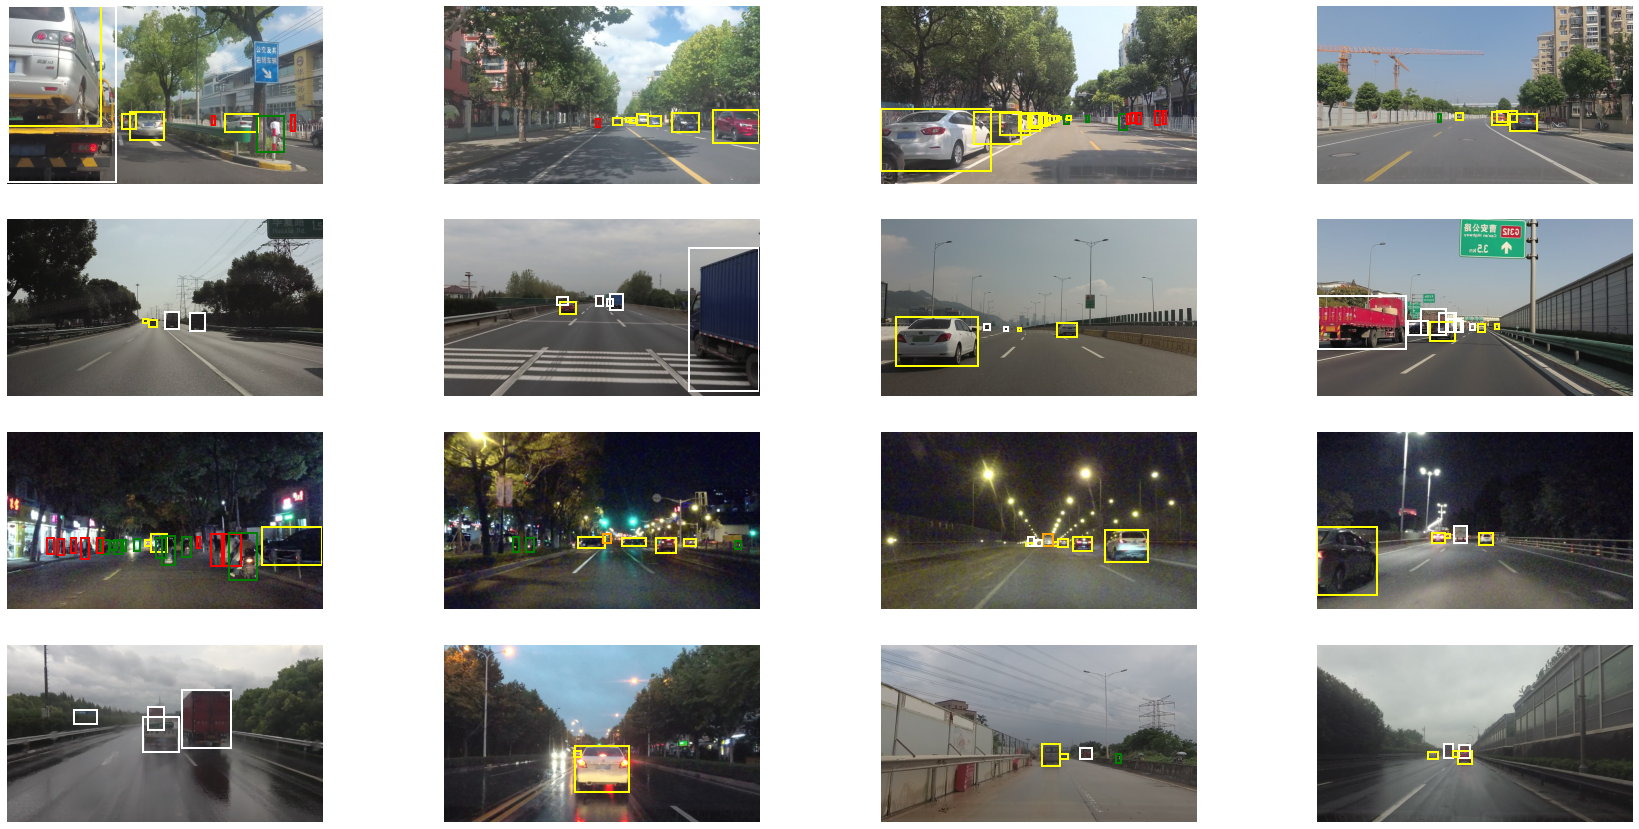

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(30, 15))

for ax_row, ds in zip(axes, train_sets):
    idx = np.random.randint(0, len(ds), 4)
    for ax, i in zip(ax_row, idx):
        visualize_image(i, ds, ax)

plt.savefig('./static/clad_d_examples_raw.svg', dpi=300)

Above each row contains example images for each task, the domain gaps are less severe than in class-incremental classification, but they are there and overcoming while preventing forgetting still is a challenge. CLAD-D is evaluated using the average mAP @IOU = 0.5, as in VOC Pascal. We then average this over all four tasks to give each task equal weight.
$$
\text{Average mAP} = \frac{1}{T} \sum_{t} \text{mAP}_t
$$

The original challenge had some restirctions, some of which we believe are still worth considering. Of course, if there's a good reason to deviate from them, there's no reason for not doing so now. Below are the original rules, ordered by our perceived importance at this point.

1. Maximal rehearsal memory of 250 samples.
2. Only pretraining on Microsoft COCO and/or ImageNet1K.